In [1]:
import xarray as xr
import datatree
from dask.distributed import Client, progress
from dask.distributed import Client, LocalCluster

In [2]:
cluster = LocalCluster()  

In [3]:
path_car = '/data/scratch/a/alfonso8/Carimagua.zarr'

In [4]:
dt_car = datatree.open_datatree(path_car, engine='zarr', 
                                chunks={'vcp_time':10, 'azimuth':-1, 'range':-1 })

In [5]:
ds_sw9 = dt_car['sweep_9'].ds

In [6]:
ds_sw9.vcp_time

<xarray.DataArray 'vcp_time' (vcp_time: 486)> Size: 4kB
array(['2022-08-01T00:04:29.904000000', '2022-08-01T00:09:35.348999936',
       '2022-08-01T00:14:29.238000000', ..., '2022-08-02T18:39:37.816999936',
       '2022-08-02T18:44:32.104999936', '2022-08-02T18:49:38.088999936'],
      dtype='datetime64[ns]')
Coordinates:
    altitude   float64 8B ...
    crs_wkt    int64 8B ...
    latitude   float64 8B ...
    longitude  float64 8B ...
  * vcp_time   (vcp_time) datetime64[ns] 4kB 2022-08-01T00:04:29.904000 ... 2...

In [8]:
qvp = ds_sw9.mean('azimuth')

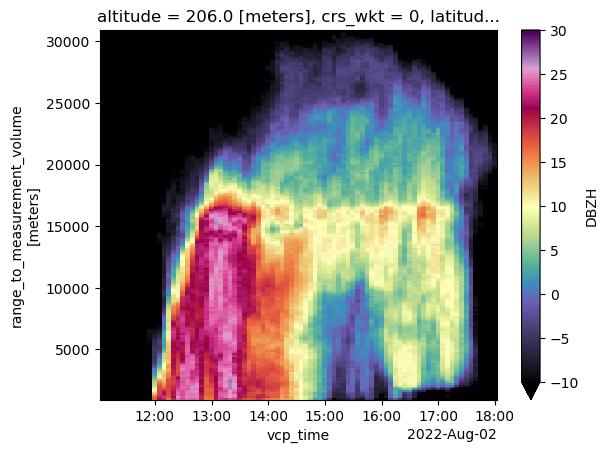

In [15]:
qvp.isel(range=range(0, 200)).sel(vcp_time=slice("2022-08-02 11:00", "2022-08-02 18:00") ).DBZH.plot(x='vcp_time', y='range', cmap='ChaseSpectral', vmin=-10, vmax=30)

In [16]:
path_gua = '/data/scratch/a/alfonso8/Guaviare.zarr'

In [17]:
dt_gua = datatree.open_datatree(path_gua, engine='zarr', #decode_times=False,
                   chunks={'vcp_time':10, 'azimuth':-1, 'range':-1 })

In [20]:
ds_gua = dt_gua['sweep_0'].ds

In [19]:
def rain_rate(z, a=200, b=1.6):
    z_lin = 10 ** (z / 10)
    return ((1 / a) ** (1 / b) * z_lin ** (1 / b)) * (5 / 60)

In [21]:
%%time
rr_depth = rain_rate(z=ds_gua.DBZH, a=250, b=1.2).sum('vcp_time').load()

CPU times: user 35.8 s, sys: 2.26 s, total: 38.1 s
Wall time: 2.81 s


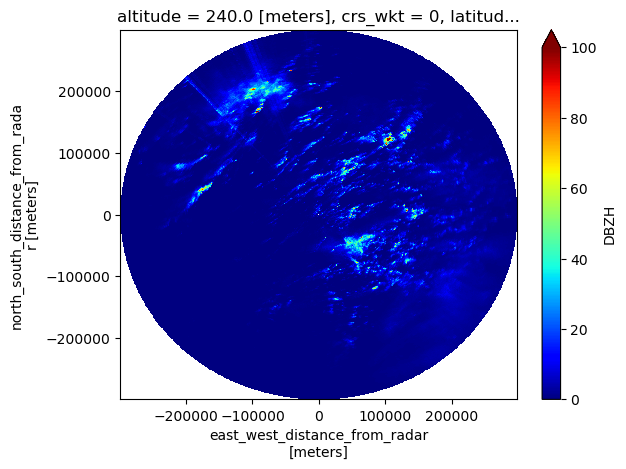

In [24]:
rr_depth.plot(x='x', y='y', cmap='jet', vmin=0, vmax=100)